# BASİT DOĞRUSAL REGRESYON

* 'pandas' kütüphanesi import edilerek 'read_csv' fonksiyonu kullanılması sağlanır.
* Veri setinde yapılan değişikliklerden asıl veri seti etkilenmesin diye farklı bir değişkene kopyalanır.
* İlk 6 satır incelenerek veri seti doğru import edildi mi bakılır.

In [4]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv") # usecols = [1,2,3,4]
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* Index'i sütun olarak aldığı için ilk sütun 'iloc[:, 1:len(df)]' ile kaldırıldı.
* Tüm gözlemleri seç, 1'den len(df)'e kadar al ve df'e geri at.

In [5]:
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* Tanımlayıcı istatistikleri görmek için 'describe' fonksiyonu kullanılır.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


*  Veri setinde eksik gözlem olup olmadığına 2 şekilde bakılabilir.
   * İlk kod satırı True/False döndürür.
   * İkinci kod satırı ise sayısal değer döndürür.

In [7]:
df.isnull().values.any()
df.isnull().values.sum()

0

* Değişkenler arasındaki ilişkiyi görmek için 'corr' foknksiyonu kullanılır.
    * Satış değişkeni ve TV değişkeni arasında yüksek seviyeli korelasyon görülmektedir. 
    * Satış değişkeni ile Radio ve Newspaper değişkenleri arasında orta seviye ve güçlü olmayan ilişki mevcuttur.
    * TV, Radio ve Newspaper değişkenleri arasında düşük seviyeli bir korelasyon vardır.
    * Buradan yola çıkılarak Satış değişkeni bağımlı değişken olarak ele alınırsa en çok satış değişkenini açıklayan değişken TV değişkenidir.

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


* Yukarıdaki sayısal ilişkilerden sonra bir de görsel ilişkiye bakılmak istenirse Python'da bulunan 'seaborn' kütüphanesi import edilmelidir.
* 'pairplot' fonksiyonu ile regresyon türünden grafik oluşturulmuştur.
* Bu görsele bakıldığında, Sales değişkeni ile TV ve Radio değşkenleri arasında doğrusal bir ilişki söz konusu olduğu görülmektedir.
* Yukarıdaki sayısal değerler ile beraber incelendiğinde daha anlamlı ve doğru sonuçlar elde edilmektedir.

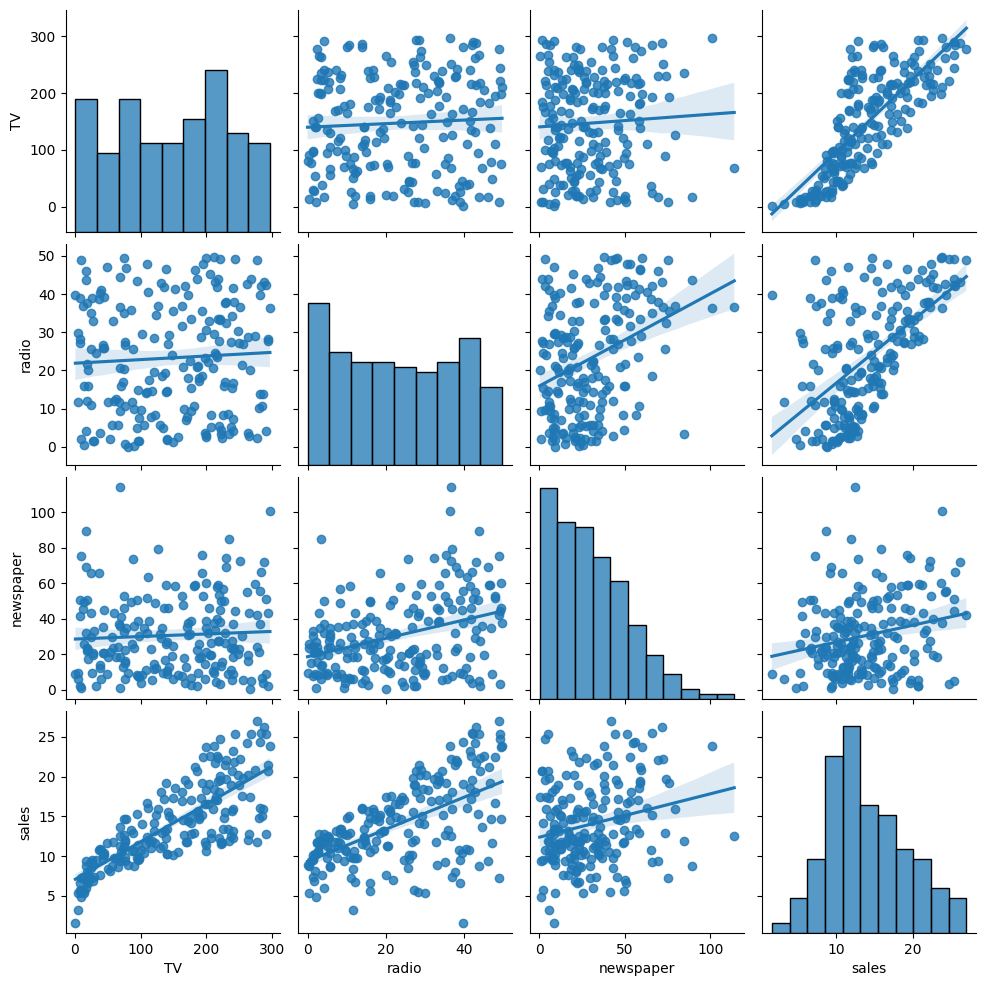

In [10]:
import seaborn as sns
sns.pairplot(df, kind = "reg")

* Yine seaborn altındaki bir fonksiyon olan 'joinplot' ile ikili ilişkiler incelenebilir.

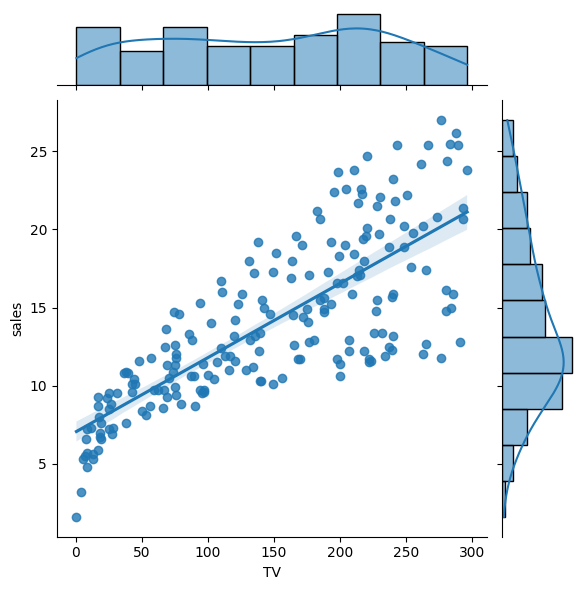

In [11]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

* Stats model kütüphanesi kullanılarak Regresyon modeli kurulmuştur.
* X değişkenine 'TV' değişkeni atanmıştır ve ardından, matris işlemlerinin yapılabilmesi için 'constant' eklemesi yapılmıştır.
* y değişkenine de 'Sales' değişkeni atanmıştır.

In [13]:
import statsmodels.api as sm

In [14]:
X = df[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
X = sm.add_constant(X) # matris işlemi için sabit 1 değeri eklenecek.

In [15]:
y = df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

* Model kurulumu OLS fonksiyonu ile gerçekleştirilmiştir.
* Model fit edilerek özet istatistikleri elde edilmiştir.

In [17]:
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        17:58:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import statsmodels.formula.api as smf
lm = smf.ols("sales~TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        16:50:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Model ile ilgili özet istatistiklerden katsayılar, standart hata, t değeri ve p değeri gibi değerler elde edilebilir.

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [34]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

* Modelin güven aralıkları için 'conf_int 'fonksiyonu kullanılır.
* f değeri, p değeri, mse ve R kare gibi değerleri de görülmektedir.

In [35]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
model.f_pvalue

1.4673897001947095e-42

In [23]:
print("f-pvalue: ", "%.5f" % model.f_pvalue)

f-pvalue:  0.00000


In [24]:
print("t-value: ", "%.5f" % model.tvalues[0:1])

t-value:  15.36028


In [46]:
model.mse_model # birim basına hata

3314.6181668686486

In [47]:
model.rsquared

0.611875050850071

In [48]:
model.rsquared_adj

0.6099148238341623

In [49]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [51]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

* Modeli print ile yazmak gerekirse;

In [53]:
print("Sales: " + str("%.2f" % model.params[0]) + " + TV" + " * " + str("%.2f" % model.params[1]))

Sales: 7.03 + TV * 0.05


* 'Matplotlib' kütüphanesi import edilerek 
* 'regplot' fonksiyonu ile grafik çizdirilir ve labellar eklenerek grafik elde edilir.

In [26]:
import matplotlib as plt

Text(0.5, 0, 'TV Harcamaları')

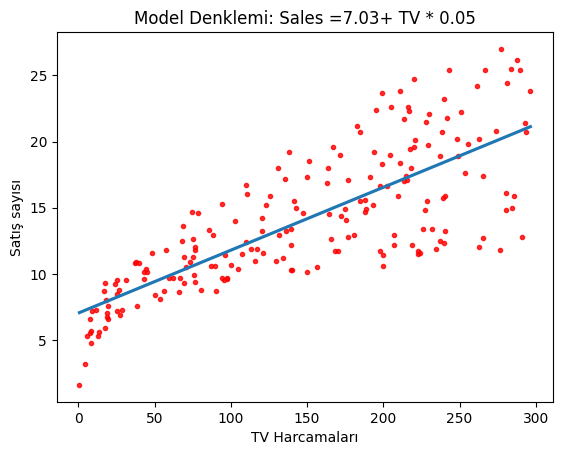

In [59]:
g=sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's': 9})
g.set_title("Model Denklemi: Sales =7.03+ TV * 0.05")
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")

* 'sklearn' kütüphanesi ile model oluşturup tahmin elde etmek.
* İlk olarak sklearn kütüphanesi, linear model bölümünden LinearRegression() methodu import edilir.

In [28]:
from sklearn.linear_model import LinearRegression

* X değişkenine yine bağımsız değişken ve y değişkenine ise bağımlı değişken atanır..
* reg değişkenine LinearRegression() methodu örnek alınarak fir fonksiyonu ile model fit edilir.
* Buradan katsayılar elde edilir.

In [41]:
X =df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X, y)
print(model.intercept_)
print(model.coef_)

[7.03259355]
[[0.04753664]]


* Model score değeri R-kare değerine denk gelmektedir. 
* Bu durumda modelde bulunan TV değişkeni, bağımlı değişken olan Sales değişkenini tek başına %0.61 açıklamaktadır.
* Gerçek hayat için güzel bir değer fakat mükemmel sonuç değildir.

In [66]:
model.score(X, y)

0.611875050850071

* tahmin dğeişkenine predict edilen değerler atanır. 
* Predict değerleri oluşturulan modelde X değerlerinin yerine koyularak elde edilen yeni y değerleridir.

In [47]:
tahmin = model.predict(X)

TAHMİN

Model denklemi:

Sales: 7.03 + TV * 0.04

Örneğin, Tv harcaması 30 birim oldugunda satıs tahmini ne kadar olmaktadır?

In [48]:
7.03 + 30 * 0.04

8.23

In [49]:
model.predict([[30]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8.45869276]])

* Birden fazla değer için elde edilmek istenirse;

In [78]:
yeni_veri = [[5], [90], [200]]

In [82]:
model.predict(yeni_veri)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])